<a href="https://colab.research.google.com/github/yayonecathy/redcrossproject/blob/main/Redcross_donor_(Classification)_Prediction_Project0327.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Code snippet 0
#installing pycaret
!pip install -U --pre pycaret


In [ ]:
#code snippet 1
#import dataset
import pandas as pd
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQzBYWDif8AqH47QpdaMsxZ0d3aXafgvL6EfnsUk6iN5QPCgrhvEky7hzI16iyfL3L2rfec3QX32JQj/pub?gid=0&single=true&output=csv')
df

,DonorUniqueId,DonorPostalCode,DonorAge,MaritalStatus,GenderIdentity,IsMemberFlag,IsAlumnusFlag,IsParentFlag,HasInvolvementFlag,WealthRating,...,ConsecutiveDonorYears,LastFiscalYearDonation,Donation2FiscalYearsAgo,Donation3FiscalYearsAgo,Donation4FiscalYearsAgo,Donation5FiscalYearsAgo,CurrentFiscalYearDonation,CumulativeDonationAmount,DonorDateOfBirth,DonorIndicatorFlag.
0,1,23187.0,42,Married,Female,N,N,N,N,NaN,...,1,$0,$0,$0,$0,$0,$0,10.0,NaN,Y
1,2,77643.0,33,NaN,Female,N,Y,N,Y,NaN,...,0,$0,$0,$0,$0,$0,$0,2100.0,6/16/1985,Y
2,3,NaN,42,Married,Female,N,N,N,N,NaN,...,1,$0,$0,$0,$0,$0,$200,200.0,NaN,Y
3,4,47141.0,31,NaN,Female,N,Y,N,Y,NaN,...,0,$0,$0,$0,$0,$0,$0,0.0,12/3/1987,N
4,5,92555.0,68,NaN,Female,N,N,N,N,NaN,...,0,$0,$0,$0,$0,$0,$0,505.0,9/11/1950,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34503,34504,7848.0,42,NaN,Female,N,N,N,N,NaN,...,0,$0,$0,$0,$0,$0,$0,0.0,NaN,N
34504,34505,28275.0,24,NaN,Male,N,N,N,N,"$250,000-$499,999",...,0,$0,$0,$0,$0,$0,$0,80.0,9/23/1994,Y
34505,34506,42539.0,27,NaN,Female,N,Y,N,Y,NaN,...,0,$0,$0,$0,$0,$0,$0,0.0,1/3/1991,N
34506,34507,32733.0,46,Married,Female,N,N,N,Y,NaN,...,1,$0,$0,$0,$120,$0,$0,120.0,5/11/1972,Y


In [ ]:
# code snippet 2
#prompt: write a code to change data type of column DonorPostalCode to integer

df['DonorPostalCode'] = pd.to_numeric(df['DonorPostalCode'], errors='coerce').astype('Int64')
df.dtypes

,0
DonorUniqueId,int64
DonorPostalCode,Int64
DonorAge,int64
MaritalStatus,object
GenderIdentity,object
IsMemberFlag,object
IsAlumnusFlag,object
IsParentFlag,object
HasInvolvementFlag,object
WealthRating,object


In [ ]:
# code snippet 3
#remapping DonorPostalCode to regions
df['DonorPostalCode'] = df['DonorPostalCode'].astype(str)

# Function to map postal codes to regions based on first 3 digits
def map_postal_to_region(postal_code):
    if not postal_code.isdigit() or postal_code == 'nan':
        return 'Unknown'
    # Extract the first 3 digits
    prefix = int(postal_code[:3])

    # Mapping based on postal code ranges
    if 60 <= prefix <= 69:
        return 'Connecticut'
    elif 39 <= prefix <= 49:
        return 'Maine'
    elif 10 <= prefix <= 27:
        return 'Massachusetts'
    elif 30 <= prefix <= 38:
        return 'New Hampshire'
    elif 70 <= prefix <= 89:
        return 'New Jersey'
    elif 100 <= prefix <= 119:
        return 'New York (NYC area)'
    elif 28 <= prefix <= 29:
        return 'Rhode Island'
    elif 50 <= prefix <= 59:
        return 'Vermont'
    elif 197 <= prefix <= 199:
        return 'Delaware'
    elif 120 <= prefix <= 149:
        return 'New York (Upstate)'
    elif 150 <= prefix <= 196:
        return 'Pennsylvania'
    elif 206 <= prefix <= 219:
        return 'Maryland'
    elif 270 <= prefix <= 289:
        return 'North Carolina'
    elif 290 <= prefix <= 299:
        return 'South Carolina'
    elif 220 <= prefix <= 246:
        return 'Virginia'
    elif 200 <= prefix <= 200:
        return 'Washington D.C.'
    elif 350 <= prefix <= 369:
        return 'Alabama'
    elif 320 <= prefix <= 349:
        return 'Florida'
    elif 300 <= prefix <= 319:
        return 'Georgia'
    elif 386 <= prefix <= 397:
        return 'Mississippi'
    elif 370 <= prefix <= 385:
        return 'Tennessee'
    elif 460 <= prefix <= 479:
        return 'Indiana'
    elif 400 <= prefix <= 427:
        return 'Kentucky'
    elif 480 <= prefix <= 499:
        return 'Michigan'
    elif 430 <= prefix <= 459:
        return 'Ohio'
    elif 247 <= prefix <= 268:
        return 'West Virginia'
    elif 500 <= prefix <= 528:
        return 'Iowa'
    elif 550 <= prefix <= 567:
        return 'Minnesota'
    elif 630 <= prefix <= 658:
        return 'Missouri'
    elif 680 <= prefix <= 693:
        return 'Nebraska'
    elif 580 <= prefix <= 588:
        return 'North Dakota'
    elif 570 <= prefix <= 577:
        return 'South Dakota'
    elif 530 <= prefix <= 549:
        return 'Wisconsin'
    elif 716 <= prefix <= 729:
        return 'Arkansas'
    elif 600 <= prefix <= 629:
        return 'Illinois'
    elif 660 <= prefix <= 679:
        return 'Kansas'
    elif 700 <= prefix <= 714:
        return 'Louisiana'
    elif 730 <= prefix <= 749:
        return 'Oklahoma'
    elif 750 <= prefix <= 799:
        return 'Texas (northern)'
    elif 850 <= prefix <= 865:
        return 'Arizona'
    elif 870 <= prefix <= 884:
        return 'New Mexico'
    elif 797 <= prefix <= 799:
        return 'Texas (western)'
    elif 800 <= prefix <= 816:
        return 'Colorado'
    elif 832 <= prefix <= 838:
        return 'Idaho'
    elif 590 <= prefix <= 599:
        return 'Montana'
    elif 889 <= prefix <= 898:
        return 'Nevada'
    elif 840 <= prefix <= 847:
        return 'Utah'
    elif 820 <= prefix <= 831:
        return 'Wyoming'
    elif 995 <= prefix <= 999:
        return 'Alaska'
    elif 900 <= prefix <= 961:
        return 'California'
    elif 967 <= prefix <= 968:
        return 'Hawaii'
    elif 970 <= prefix <= 979:
        return 'Oregon'
    elif 980 <= prefix <= 994:
        return 'Washington'
    else:
        return 'Unknown'

# Apply the function to the DonorPostalCode column
df['Region'] = df['DonorPostalCode'].apply(map_postal_to_region)

# View the updated DataFrame
print(df[['DonorPostalCode', 'Region']])

      DonorPostalCode               Region
0               23187             Virginia
1               77643     Texas (northern)
2                <NA>              Unknown
3               47141              Indiana
4               92555           California
...               ...                  ...
34503            7848     Texas (northern)
34504           28275       North Carolina
34505           42539             Kentucky
34506           32733              Florida
34507           10015  New York (NYC area)

[34508 rows x 2 columns]


In [ ]:
#code snippet 4
#prompt: for columns 'LastFiscalYearDonation', 'Donation2FiscalYearsAgo','Donation3FiscalYearsAgo','Donation4FiscalYearsAgo','Donation5FiscalYearsAgo','CurrentFiscalYearDonation', drop the decimal point, and the $ in front

columns_to_clean = ['LastFiscalYearDonation', 'Donation2FiscalYearsAgo',
                   'Donation3FiscalYearsAgo', 'Donation4FiscalYearsAgo',
                   'Donation5FiscalYearsAgo', 'CurrentFiscalYearDonation']

for column in columns_to_clean:
  df[column] = df[column].str.replace('$', '', regex=False)
  df[column] = df[column].str.replace('.00', '', regex=False)
  df[column] = pd.to_numeric(df[column], errors='coerce')
  df[column] = df[column].fillna(0).astype(int)
df

,DonorUniqueId,DonorPostalCode,DonorAge,MaritalStatus,GenderIdentity,IsMemberFlag,IsAlumnusFlag,IsParentFlag,HasInvolvementFlag,WealthRating,...,LastFiscalYearDonation,Donation2FiscalYearsAgo,Donation3FiscalYearsAgo,Donation4FiscalYearsAgo,Donation5FiscalYearsAgo,CurrentFiscalYearDonation,CumulativeDonationAmount,DonorDateOfBirth,DonorIndicatorFlag.,Region
0,1,23187,42,Married,Female,N,N,N,N,NaN,...,0,0,0,0,0,0,10.0,NaN,Y,Virginia
1,2,77643,33,NaN,Female,N,Y,N,Y,NaN,...,0,0,0,0,0,0,2100.0,6/16/1985,Y,Texas (northern)
2,3,<NA>,42,Married,Female,N,N,N,N,NaN,...,0,0,0,0,0,200,200.0,NaN,Y,Unknown
3,4,47141,31,NaN,Female,N,Y,N,Y,NaN,...,0,0,0,0,0,0,0.0,12/3/1987,N,Indiana
4,5,92555,68,NaN,Female,N,N,N,N,NaN,...,0,0,0,0,0,0,505.0,9/11/1950,Y,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34503,34504,7848,42,NaN,Female,N,N,N,N,NaN,...,0,0,0,0,0,0,0.0,NaN,N,Texas (northern)
34504,34505,28275,24,NaN,Male,N,N,N,N,"$250,000-$499,999",...,0,0,0,0,0,0,80.0,9/23/1994,Y,North Carolina
34505,34506,42539,27,NaN,Female,N,Y,N,Y,NaN,...,0,0,0,0,0,0,0.0,1/3/1991,N,Kentucky
34506,34507,32733,46,Married,Female,N,N,N,Y,NaN,...,0,0,0,120,0,0,120.0,5/11/1972,Y,Florida


In [ ]:
# Code snippet 5
#prompt: for column CumulativeDonationAmount, drop the decimal point

df['CumulativeDonationAmount'] = df['CumulativeDonationAmount'].astype(str).str.replace('.', '')


In [ ]:
#code snippet 6
# prompt: for column 'WealthRating', map 1 for '$1-$24,999', 2 for '$25,000-$49,999', 3 for $50,000-$99,999, 4 for $100,000-$249,999, 5 for $250,000-$499,999, 6 for $500,000-$999,999, 7 for $1,000,000-$2,499,999, 8 for $2,500,000-$4,999,999

# Create a mapping dictionary for WealthRating
wealth_rating_mapping = {
    '$1-$24,999': 1,
    '$25,000-$49,999': 2,
    '$50,000-$99,999': 3,
    '$100,000-$249,999': 4,
    '$250,000-$499,999': 5,
    '$500,000-$999,999': 6,
    '$1,000,000-$2,499,999': 7,
    '$2,500,000-$4,999,999': 8
}

# Map the WealthRating column using the mapping dictionary
df['WealthRating'] = df['WealthRating'].map(wealth_rating_mapping)

df['WealthRating'].unique()

array([nan,  3.,  4.,  2.,  5.,  1.,  7.,  6.,  8.])

In [ ]:
#code snippet 6
#setting the target variable
target = 'DonorIndicatorFlag.'

In [ ]:
#code snippet 7
#setting the noise/redundant variables
ignored_columns= ['DonorUniqueId','DonorPostalCode','DonorDateOfBirth','CumulativeDonationAmount'       ]

In [ ]:
#code snippet 8
#setting the numerical variables
numeric_columns = ['DonorAge','ConsecutiveDonorYears', 'LastFiscalYearDonation', 'Donation2FiscalYearsAgo',
       'Donation3FiscalYearsAgo', 'Donation4FiscalYearsAgo',
       'Donation5FiscalYearsAgo', 'CurrentFiscalYearDonation'  ]

In [ ]:
#code snippet 9
#setting the categorical variables
categorical_columns = ['MaritalStatus','GenderIdentity', 'IsMemberFlag', 'IsAlumnusFlag', 'IsParentFlag',
       'HasInvolvementFlag', 'WealthRating', 'AcademicDegreeLevel',
       'PreferredAddressType', 'HasEmailFlag','Region']

In [ ]:
#code snippet 10
#importing classification libraries
from pycaret.classification import *

In [ ]:
#code snippet 11
#setting /configuring pycaret model
classificaiton_setup = setup(data = df, target = target,
                              ignore_features = ignored_columns,
                              numeric_features = numeric_columns,
                             categorical_features = categorical_columns)

,Description,Value
0,Session id,8054
1,Target,DonorIndicatorFlag.
2,Target type,Binary
3,Target mapping,"N: 0, Y: 1"
4,Original data shape,"(34508, 24)"
5,Transformed data shape,"(34508, 44)"
6,Transformed train set shape,"(24155, 44)"
7,Transformed test set shape,"(10353, 44)"
8,Ignore features,4
9,Numeric features,8


In [ ]:
#code snippet 12
#invoking ML alo
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.6211,0.5000,0.6211,0.3858,0.4759,0.0000,0.0000,0.4240
lr,Logistic Regression,0.6208,0.5595,0.6208,0.4994,0.4765,-0.0002,-0.0021,1.9390
ridge,Ridge Classifier,0.6206,0.5559,0.6206,0.5013,0.4767,-0.0003,-0.0025,0.5870
lda,Linear Discriminant Analysis,0.6203,0.5553,0.6203,0.5333,0.4774,-0.0002,0.0001,0.6490
ada,Ada Boost Classifier,0.6201,0.5587,0.6201,0.5379,0.4785,0.0001,0.0019,1.1600
gbc,Gradient Boosting Classifier,0.6190,0.5576,0.6190,0.5184,0.4784,-0.0017,-0.0068,2.6080
lightgbm,Light Gradient Boosting Machine,0.6099,0.5480,0.6099,0.5308,0.4990,0.0004,0.0012,2.1130
xgboost,Extreme Gradient Boosting,0.6004,0.5420,0.6004,0.5295,0.5121,-0.0001,0.0000,0.8340
rf,Random Forest Classifier,0.5626,0.5224,0.5626,0.5334,0.5400,0.0081,0.0084,2.9920
knn,K Neighbors Classifier,0.5554,0.5205,0.5554,0.5345,0.5408,0.0106,0.0107,1.1760


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

DummyClassifier(constant=None, random_state=1741, strategy='prior')

In [ ]:
#code snippet 13
#creating the model with best algo(accurac plus best precision)
best_model = create_model('lr')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6747,0.7431,0.6747,0.7600,0.6745,0.3860,0.4349
1,0.6676,0.7383,0.6676,0.7455,0.6684,0.3694,0.4119
2,0.6867,0.7437,0.6867,0.7686,0.6871,0.4065,0.4546
3,0.6821,0.7500,0.6821,0.7637,0.6825,0.3980,0.4452
4,0.6813,0.7546,0.6813,0.7603,0.6820,0.3953,0.4405
5,0.6845,0.7481,0.6845,0.7518,0.6865,0.3953,0.4323
6,0.6820,0.7609,0.6820,0.7505,0.6839,0.3913,0.4288
7,0.6919,0.7540,0.6919,0.7795,0.6918,0.4186,0.4717
8,0.6754,0.7372,0.6754,0.7543,0.6760,0.3843,0.4286


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

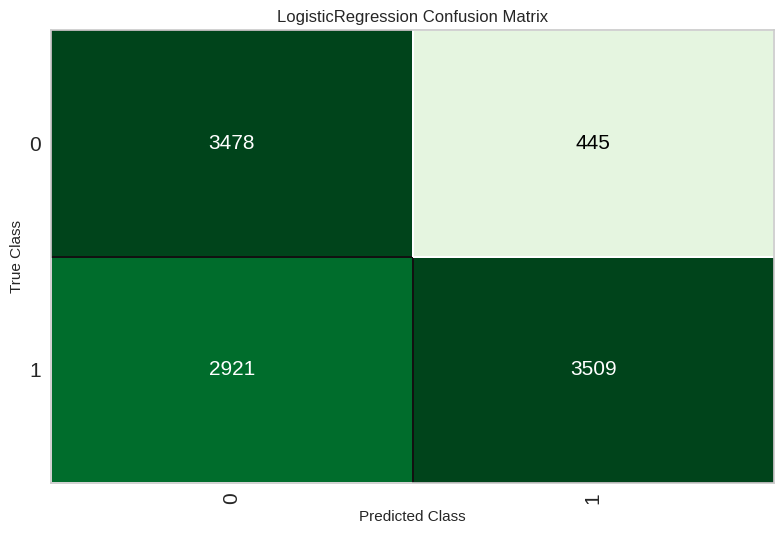

In [ ]:
#code snippet 14
#displaying confusion matrix
plot_model(best_model, plot = 'confusion_matrix')

In [ ]:
#code snippet 15
# predicting the donor flag status
donor_predictions= predict_model(best_model,df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6804,0.7546,0.6804,0.7616,0.6809,0.3946,0.4413


In [ ]:
#code snippet 16
#exporting prediction result to csv
donor_predictions.to_csv("redcross donation predictions8.csv")